# By Winona
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import os

In [19]:
# Cargar los datos
file = os.path.abspath('../data/bywinona_reviews.csv')
df = pd.read_csv(file)
df

,date,info by,author_name,author_location,type of review,title,rated,time_posted,paragraph,date_of_experience,reply_author,reply_date,reply_paragraph
0,2024-09-12 19:29:01,Info for Courtney Coleman,Courtney Coleman,US,Verified,Loving my new journey,5.0,2024-09-12T15:07:05.000Z,I know that this journey is different for ever...,12 September 2024,NaN,NaN,NaN
1,2024-09-12 19:29:01,Info for Lmegk,Lmegk,US,Verified,Quality of Life,5.0,2024-09-11T05:02:27.000Z,The whole experience has been amazing. My meno...,10 September 2024,Reply from By Winona,2024-09-11T09:06:22.000Z,Thank you so much for sharing your heartfelt e...
2,2024-09-12 19:29:01,Info for AS,AS,US,Verified,very good experience,4.0,2024-09-11T14:05:33.000Z,very good experience. The website is a little ...,05 September 2024,Reply from By Winona,2024-09-12T08:31:34.000Z,Thank you for sharing your feedback! We're gla...
3,2024-09-12 19:29:01,Info for Holly Hernandez,Holly Hernandez,US,Verified,I Been with Winona for three months,5.0,2024-09-11T16:45:24.000Z,I Been with Winona for three months And I feel...,04 September 2024,Reply from By Winona,2024-09-12T08:38:24.000Z,Thank you so much for sharing your incredible ...
4,2024-09-12 19:29:01,Info for Jenny Perez,Jenny Perez,US,Verified,Life changing,5.0,2024-09-11T00:47:20.000Z,I was having constant hot flashes all day. I w...,10 September 2024,Reply from By Winona,2024-09-11T09:04:32.000Z,Thank you so much for sharing your journey! It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,2024-09-12 19:31:50,Info for Hannah Lebowitz,Hannah Lebowitz,US,NaN,Stick with it!,5.0,2022-01-30T03:08:49.000Z,This is the best company ever. I was skeptical...,30 January 2022,NaN,NaN,NaN
2392,2024-09-12 19:31:50,Info for Heather Nickell,Heather Nickell,US,NaN,Winona is just what I was looking for,5.0,2022-01-26T19:35:12.000Z,Winona is just what I was looking for: help wi...,26 January 2022,NaN,NaN,NaN
2393,2024-09-12 19:31:50,Info for Michele Farrar,Michele Farrar,US,NaN,Excellent customer service!,5.0,2022-01-25T12:05:36.000Z,I would like to say that since starting the cr...,25 January 2022,NaN,NaN,NaN
2394,2024-09-12 19:31:50,Info for Cheri,Cheri,US,NaN,I found this website so educational,5.0,2021-05-23T20:43:12.000Z,I found this website so educational and user f...,23 May 2021,NaN,NaN,NaN


In [20]:
# Convertir columnas de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'])
df['time_posted'] = pd.to_datetime(df['time_posted'])
df['date_of_experience'] = pd.to_datetime(df['date_of_experience'], format='%d %B %Y') 
# df['date_of_experience'] = pd.to_datetime(df['date_of_experience'], format='%B %d, %Y')

# Rellenar valores nulos
# df['paragraph'].fillna('', inplace=True)
# df['reply_paragraph'].fillna('', inplace=True)

# Normalizar datos
df['author_location'] = df['author_location'].str.upper()
df['rated'] = df['rated'].astype(float)

***

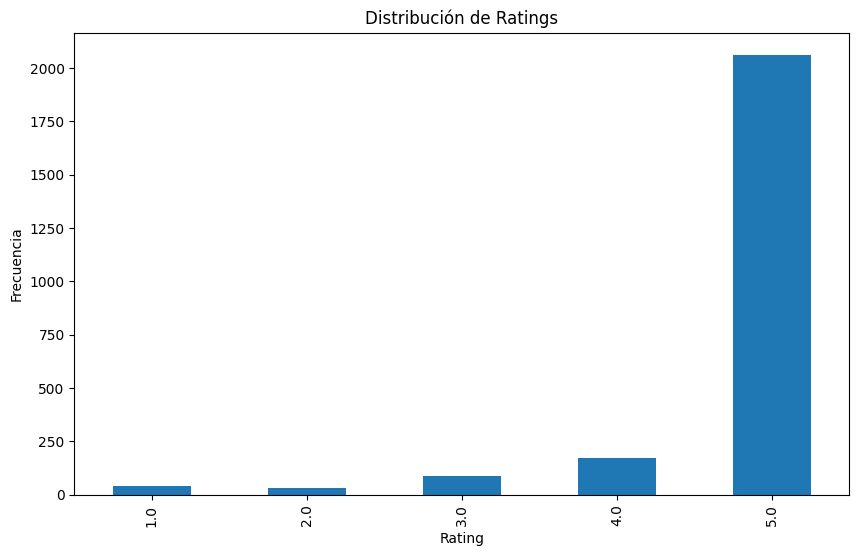

In [4]:
# Análisis de la distribución de ratings
plt.figure(figsize=(10, 6))
df['rated'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()
plt.close()

***

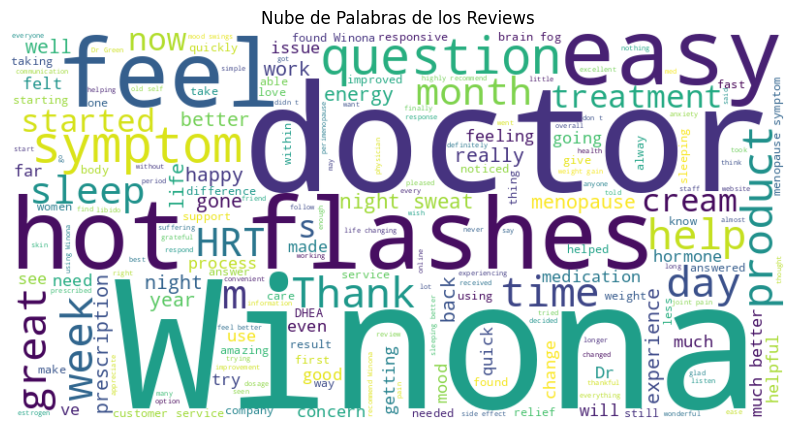

In [5]:
# Análisis de frecuencia de palabras
# rev_paragraph = df['paragraph'].fillna('', inplace=False)
# all_text = ' '.join(rev_paragraph)
all_text = ' '.join(df['paragraph'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Reviews')
plt.show()
plt.close()

***

/tmp/ipykernel_209147/1813373493.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ratings = df['rated'].resample('M').mean()


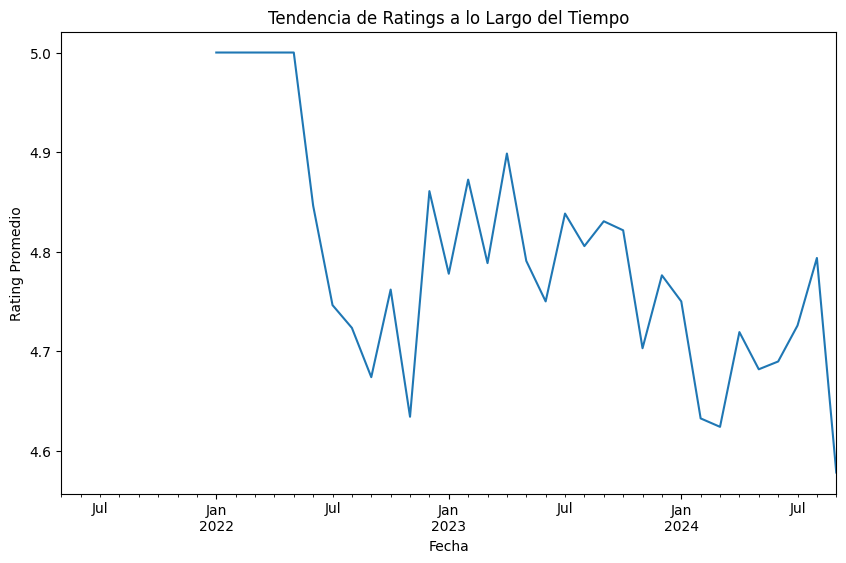

In [6]:
# Tendencias temporales
df.set_index('time_posted', inplace=True)
monthly_ratings = df['rated'].resample('M').mean()
plt.figure(figsize=(10, 6))
monthly_ratings.plot(kind='line')
plt.title('Tendencia de Ratings a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Rating Promedio')
plt.show()
plt.close()

***

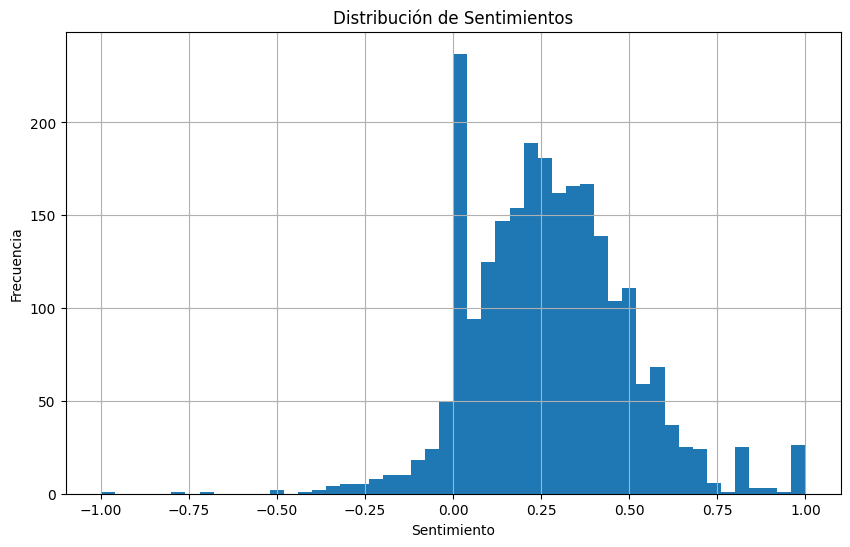

In [7]:
# Análisis de sentimientos
df['sentiment'] = df['paragraph'].fillna('', inplace=False).apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=50)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()
plt.close()

## Análisis de la Gráfica
***

### Eje X (Sentimiento):
La escala va de -1.0 a 1.0.
* -1.0 representa un sentimiento extremadamente negativo.
* 0.0 representa un sentimiento neutral.
* 1.0 representa un sentimiento extremadamente positivo.

### Eje Y (Frecuencia):
Muestra la cantidad de reviews que caen en cada rango de sentimiento.
La frecuencia varía desde 0 hasta más de 25.

### Observaciones


### Interpretación
* **Neutralidad**: La alta concentración alrededor de 0.0 sugiere que muchos usuarios tienen opiniones neutrales sobre el servicio.
* **Polarización Baja**: La baja frecuencia en los extremos (-1.0 y 1.0) indica que pocos usuarios tienen opiniones extremadamente negativas o positivas.

### Siguientes Pasos

* Análisis Detallado: Investigar qué aspectos específicos del servicio generan sentimientos positivos o negativos.
* Segmentación: Analizar los sentimientos por diferentes segmentos, como fechas, tipos de reviews, o ubicaciones de los autores.

## 1. Análisis de sentimientos

In [8]:
# Análisis de sentimientos
df['sentiment'] = df['paragraph'].fillna('', inplace=False).apply(lambda x: TextBlob(x).sentiment.polarity)

# Filtrar reviews positivos y negativos
positive_reviews = df[df['sentiment'] > 0]['paragraph']
negative_reviews = df[df['sentiment'] < 0]['paragraph']

# Generar nubes de palabras para reviews positivos y negativos
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

### Nube de Palabras de Reviews Positivos

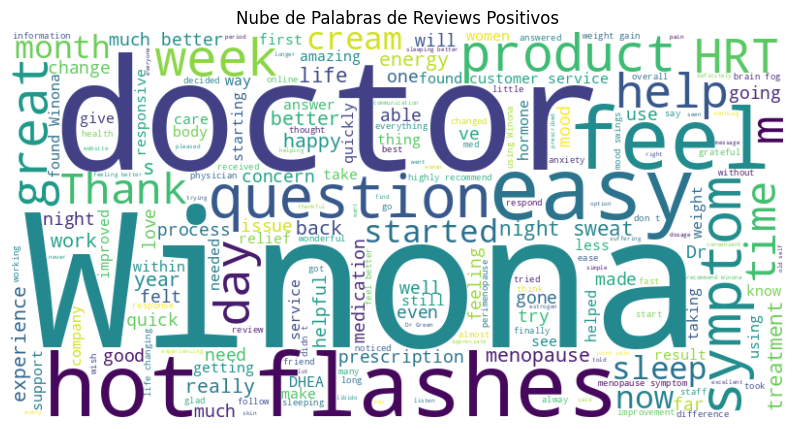

In [9]:
# Mostrar nubes de palabras
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reviews Positivos')
plt.show()
plt.close()

### Nube de Palabras de Reviews Negativos

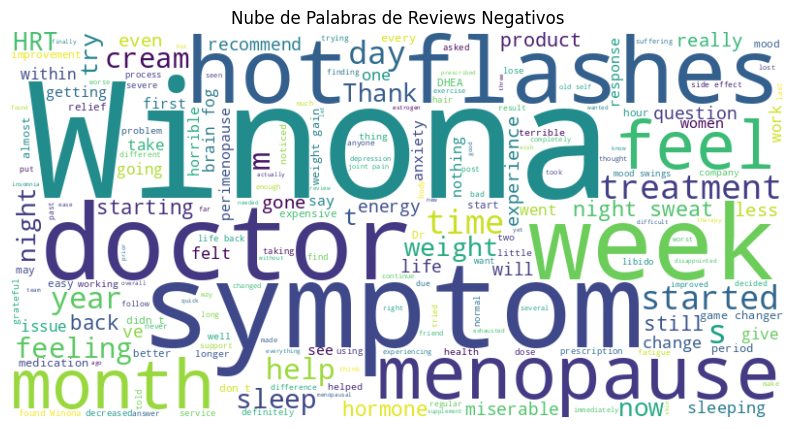

In [10]:
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reviews Negativos')
plt.show()
plt.close()

## 2. Segmentación de Datos

### Segmentar por ubicación del autor

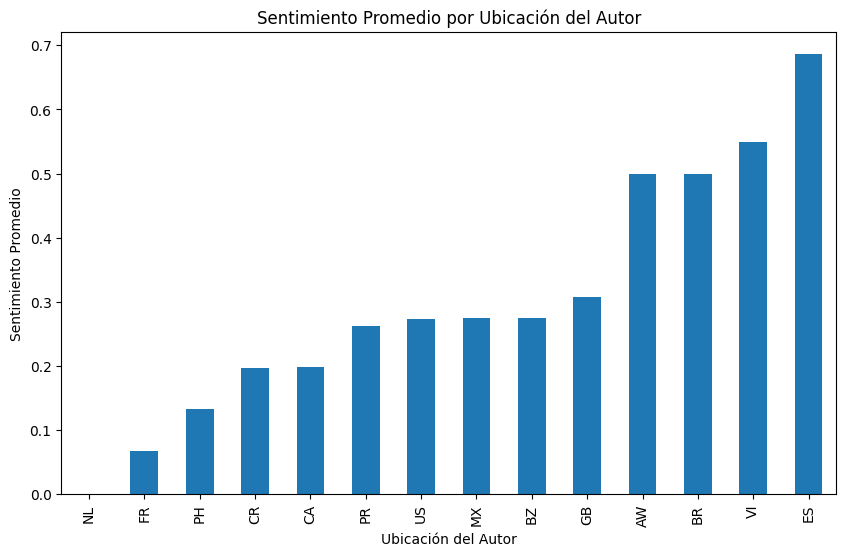

In [11]:
# Segmentar por ubicación del autor
location_sentiment = df.groupby('author_location')['sentiment'].mean().sort_values()

plt.figure(figsize=(10, 6))
location_sentiment.plot(kind='bar')
plt.title('Sentimiento Promedio por Ubicación del Autor')
plt.xlabel('Ubicación del Autor')
plt.ylabel('Sentimiento Promedio')
plt.show()
plt.close()

### Segmentar por fecha de experiencia

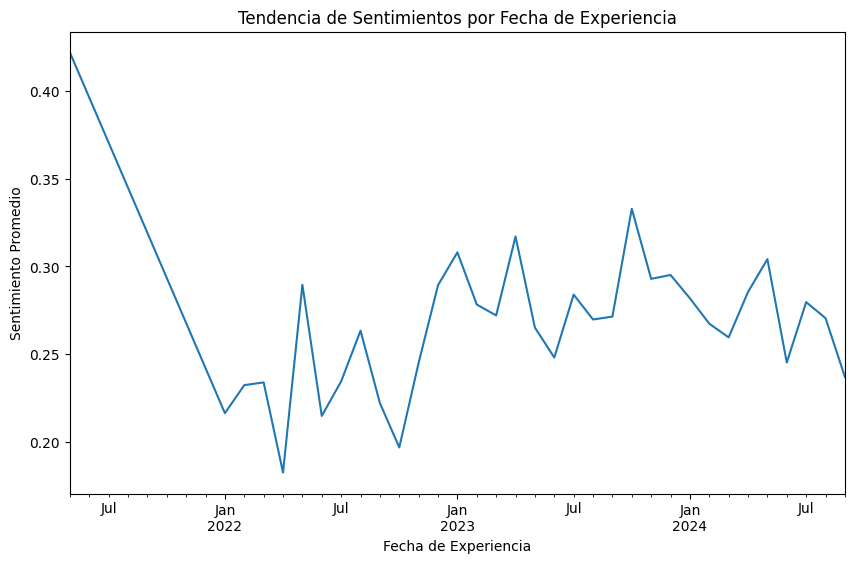

In [12]:
# Segmentar por fecha de experiencia
df['year_month'] = df['date_of_experience'].dt.to_period('M')
monthly_sentiment = df.groupby('year_month')['sentiment'].mean()

plt.figure(figsize=(10, 6))
monthly_sentiment.plot(kind='line')
plt.title('Tendencia de Sentimientos por Fecha de Experiencia')
plt.xlabel('Fecha de Experiencia')
plt.ylabel('Sentimiento Promedio')
plt.show()

## 3. Identificación de Áreas de Mejora y Puntos Fuertes

### Palabras más comunes en reviews positivos

In [13]:
# Palabras más comunes en reviews positivos
positive_words = pd.Series(' '.join(positive_reviews).lower().split()).value_counts().head(20)
print("Palabras más comunes en reviews positivos:")
positive_words

Palabras más comunes en reviews positivos:


i         5529
and       4574
the       3651
my        3200
to        3185
a         2016
have      1438
was       1348
with      1235
for       1222
is        1213
of        1203
so        1075
in         972
winona     962
been       951
it         890
has        826
that       790
am         645
Name: count, dtype: int64

### Palabras más comunes en reviews negativos

In [14]:
# Palabras más comunes en reviews negativos
negative_words = pd.Series(' '.join(negative_reviews).lower().split()).value_counts().head(20)
print("Palabras más comunes en reviews negativos:")
negative_words

Palabras más comunes en reviews negativos:


i         436
and       320
the       278
my        250
to        241
a         176
was       113
have      113
for        97
of         95
with       82
in         81
winona     76
it         75
that       69
been       68
not        68
is         66
has        51
me         50
Name: count, dtype: int64

## 4. Visualización de Resultados

In [16]:
# Guardar nubes de palabras
positive_file = os.path.abspath('../visualizations/positive_wordcloud.png')
negative_file = os.path.abspath('../visualizations/negative_wordcloud.png')
positive_wordcloud.to_file(positive_file)
negative_wordcloud.to_file(negative_file )

# Guardar gráficos de segmentación
plt.figure(figsize=(10, 6))
location_sentiment.plot(kind='bar')
plt.title('Sentimiento Promedio por Ubicación del Autor')
plt.xlabel('Ubicación del Autor')
plt.ylabel('Sentimiento Promedio')
plt.savefig('../visualizations/location_sentiment.png')
plt.close()

plt.figure(figsize=(10, 6))
monthly_sentiment.plot(kind='line')
plt.title('Tendencia de Sentimientos por Fecha de Experiencia')
plt.xlabel('Fecha de Experiencia')
plt.ylabel('Sentimiento Promedio')
plt.savefig('../visualizations/monthly_sentiment.png')
plt.close()

***

## Diferencia en Tiempo entre la Respuesta y el Comentario

In [21]:
df['reply_date'] = pd.to_datetime(df['reply_date'])

# Calcular la diferencia en días entre el comentario y la respuesta
df['response_time'] = (df['reply_date'] - df['time_posted']).dt.days #type: ignore

# Mostrar las primeras filas para verificar
df[['time_posted', 'reply_date', 'response_time']]

,time_posted,reply_date,response_time
0,2024-09-12 15:07:05+00:00,NaT,NaN
1,2024-09-11 05:02:27+00:00,2024-09-11 09:06:22+00:00,0.0
2,2024-09-11 14:05:33+00:00,2024-09-12 08:31:34+00:00,0.0
3,2024-09-11 16:45:24+00:00,2024-09-12 08:38:24+00:00,0.0
4,2024-09-11 00:47:20+00:00,2024-09-11 09:04:32+00:00,0.0
...,...,...,...
2391,2022-01-30 03:08:49+00:00,NaT,NaN
2392,2022-01-26 19:35:12+00:00,NaT,NaN
2393,2022-01-25 12:05:36+00:00,NaT,NaN
2394,2021-05-23 20:43:12+00:00,NaT,NaN


In [22]:
# Filtrar filas donde response_time es mayor a 0
filtered_df = df[df['response_time'] > 0]

# Visualizar las columnas deseadas
filtered_df[['time_posted', 'reply_date', 'response_time']]

,time_posted,reply_date,response_time
15,2024-09-07 16:58:08+00:00,2024-09-09 08:46:10+00:00,1.0
18,2024-09-07 19:19:17+00:00,2024-09-09 08:49:52+00:00,1.0
22,2024-09-07 23:49:52+00:00,2024-09-09 09:09:38+00:00,1.0
25,2024-09-08 01:12:00+00:00,2024-09-09 09:11:41+00:00,1.0
30,2024-09-01 15:45:23+00:00,2024-09-02 18:25:38+00:00,1.0
...,...,...,...
1910,2023-02-26 06:47:09+00:00,2023-03-14 20:25:19+00:00,16.0
2205,2022-08-26 03:41:42+00:00,2022-08-30 18:30:53.556000+00:00,4.0
2218,2022-08-19 20:05:39+00:00,2022-08-23 16:51:33.245000+00:00,3.0
2303,2022-07-08 00:25:18+00:00,2022-07-12 21:58:00.140000+00:00,4.0


# Análisis de las Palabras Utilizadas en las Respuestas de la Clínica

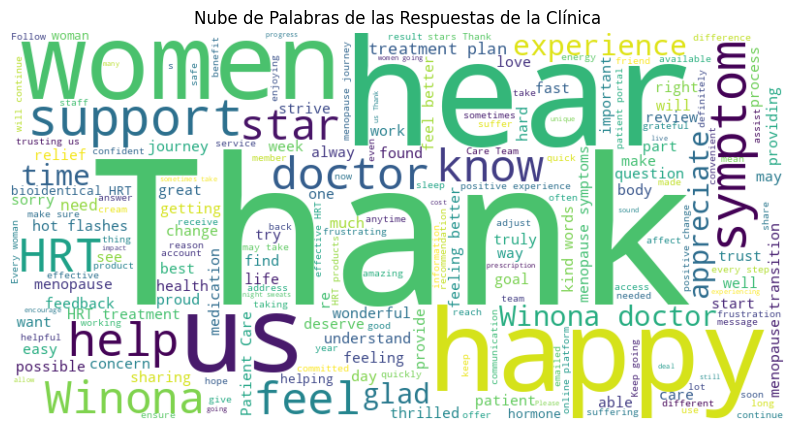

In [23]:
# Unir todos los textos de las respuestas
all_reply_text = ' '.join(df['reply_paragraph'].dropna())

# Generar la nube de palabras
reply_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reply_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(reply_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de las Respuestas de la Clínica')
plt.show()
plt.close()

# Insights Adicionales

Podemos obtener insights adicionales sobre la interacción entre clientes y la clínica, como la proporción de comentarios que reciben respuesta y el sentimiento de las respuestas.

Proporción de comentarios que reciben respuesta: 58.56%


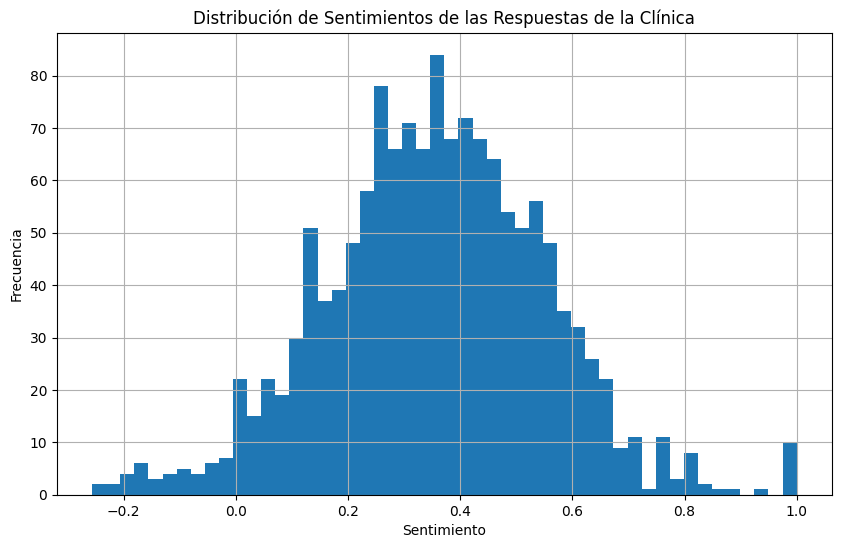

In [24]:
# Proporción de comentarios que reciben respuesta
response_rate = df['reply_paragraph'].notna().mean()
print(f"Proporción de comentarios que reciben respuesta: {response_rate:.2%}")

# Análisis de sentimientos de las respuestas
df['reply_sentiment'] = df['reply_paragraph'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else None)

# Mostrar la distribución de sentimientos de las respuestas
plt.figure(figsize=(10, 6))
df['reply_sentiment'].dropna().hist(bins=50)
plt.title('Distribución de Sentimientos de las Respuestas de la Clínica')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()
plt.close()

***

# Análisis de Títulos de Reviews

## Código para Análisis de Frecuencia de Palabras en los Títulos

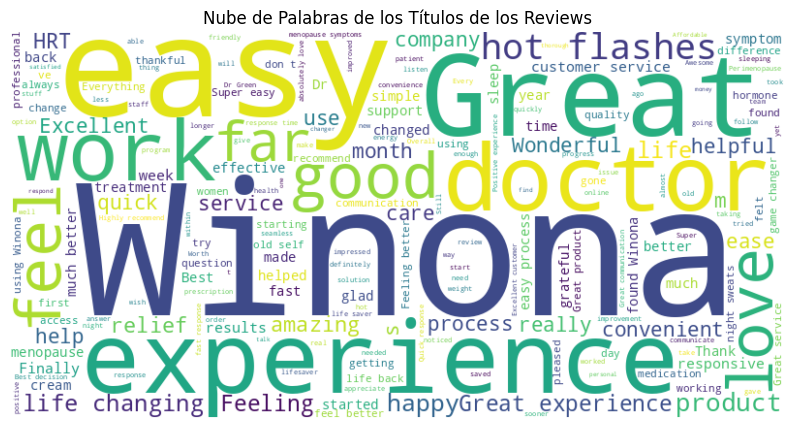

In [25]:
# Unir todos los títulos de los reviews
all_titles = ' '.join(df['title'].dropna())

# Generar la nube de palabras
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Títulos de los Reviews')
plt.show()
plt.close()

## Relación entre el Título y el Sentimiento

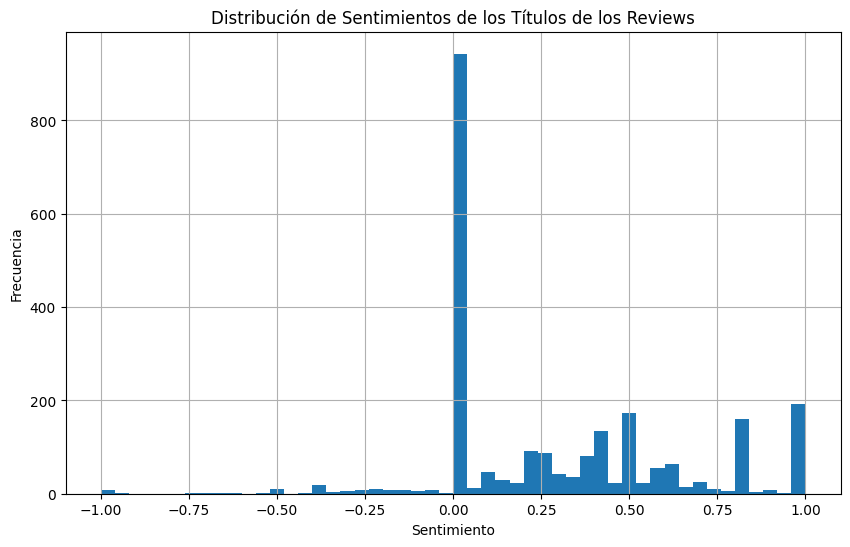

In [26]:
# Calcular el sentimiento de los títulos
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else None) # type: ignore

# Mostrar la distribución de sentimientos de los títulos
plt.figure(figsize=(10, 6))
df['title_sentiment'].dropna().hist(bins=50)
plt.title('Distribución de Sentimientos de los Títulos de los Reviews')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()
plt.close()